## Using variable sized clusters
This cluster finder aims to find clusters with arbitrary shapes and sizes for the use in electron signals or signals of the high-Z sensors.

Two algorithms are implemented: FloodFill in find_clusters_X() and Two Pass in find_clusters().
The find_clusters_X() with higher efficiency is further developed to return information regarding hit positions and energies.

In [16]:
import sys
### replace the path with your own path
sys.path.append('/home/xie_x1/aare/build/')
import aare

Found 5 clusters
Cluster 0 has 9 hits, total energy: 38.0
Cluster 1 has 9 hits, total energy: 46.0
Cluster 2 has 2 hits, total energy: 12.0
Cluster 3 has 9 hits, total energy: 52.0
Cluster 4 has 76 hits, total energy: 456.0


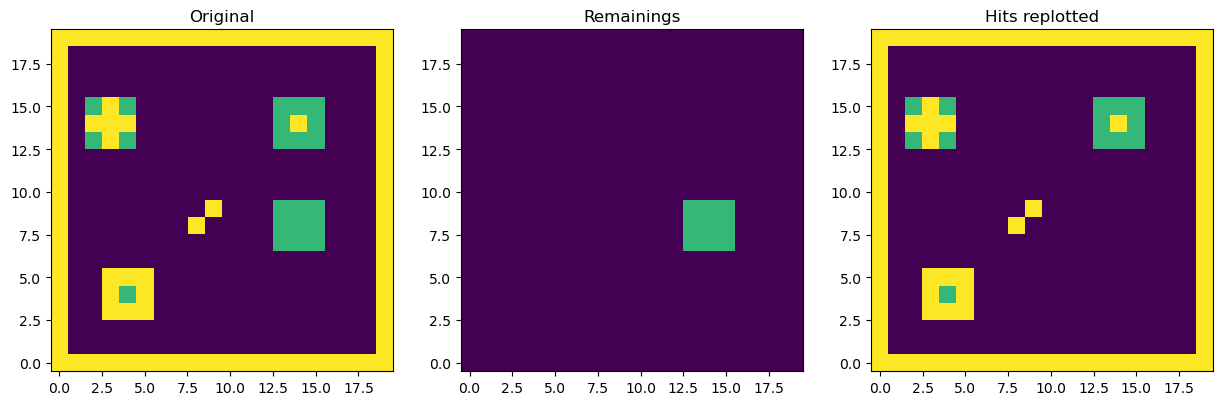

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import time

from aare import VarClusterFinder

canvas = plt.figure()
canvas.set_size_inches(15, 5)
### 3 subplots
ax1 = canvas.add_subplot(131)
ax1.set_title('Original')
ax2 = canvas.add_subplot(132)
ax2.set_title('Remainings')
ax3 = canvas.add_subplot(133)
ax3.set_title('Hits replotted')

### create a cluster finder
CF = VarClusterFinder((20, 20), 5) ### arg1: frame size, arg2: threshold
CF.set_peripheralThresholdFactor(2)

### create signal and noise frames to play with
noiseFrame = np.ones((20, 20)) ### 2D noise of 1
CF.set_noiseMap(noiseFrame)
frame = np.zeros((20, 20))

### add signals
### cluster 1
frame[3:6, 3:6] = 6
frame[4, 4] = 4
### cluster 2
frame[13:16, 2:5] = 4 ### the peripheral hit between 2*sigma and 5*sigma will be collected 
frame[13:16, 3] = 6
frame[14, 2:5] = 6
### cluster 3 below 5*sigma=5
frame[7:10, 13:16] = 4 ### hits below 5*sigma will be ignored
### cluster 4
frame[13:16, 13:16] = 4 ### the peripheral hit between 2*sigma and 5*sigma will be collected 
frame[14, 14] = 6
### cluster 5
frame[0, :] = 6
frame[-1, :] = 6
frame[:, 0] = 6
frame[:, -1] = 6
### cluster 6
frame[8, 8] = 6 ### the four diagonal hits will be 
frame[9, 9] = 6

ax1.imshow(frame, origin='lower', vmin=0, vmax=6)

CF.find_clusters_X(frame)
clusters = CF.hits()
print(f'Found {len(clusters)} clusters')
ax2.imshow(frame, origin='lower', vmin=0, vmax=6)

newFrame = np.zeros((20, 20))
for i_cluster in range(len(clusters)):
    clusterSize = clusters['size'][i_cluster]
    xs = clusters['cols'][i_cluster]
    ys = clusters['rows'][i_cluster]
    enes = clusters['enes'][i_cluster]
    energy = clusters['energy'][i_cluster]
    print(f'Cluster {i_cluster} has {clusterSize} hits, total energy: {energy}')
    for i in range(clusterSize):
        newFrame[ys[i], xs[i]] = enes[i]
ax3.imshow(newFrame, origin='lower', vmin=0, vmax=6)

In [18]:
%timeit frame = np.ones((20, 20))*6

1.44 µs ± 1.77 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [19]:
%timeit frame = np.ones((20, 20))*6; CF.find_clusters(frame)

17.4 µs ± 754 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
%timeit frame = np.ones((20, 20))*6; CF.find_clusters_X(frame)

13.8 µs ± 954 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
